# Sched Square

This tutorial includes everything you need to set up decision optimization engines, build constraint programming models.


When you finish this tutorial, you'll have a foundational knowledge of _Prescriptive Analytics_.

>This notebook is part of **[Prescriptive Analytics for Python](http://ibmdecisionoptimization.github.io/docplex-doc/)**
>
>It requires either an [installation of CPLEX Optimizers](http://ibmdecisionoptimization.github.io/docplex-doc/getting_started.html) or it can be run on [IBM Cloud Pak for Data as a Service](https://www.ibm.com/products/cloud-pak-for-data/as-a-service/) (Sign up for a [free IBM Cloud account](https://dataplatform.cloud.ibm.com/registration/stepone?context=wdp&apps=all>)
and you can start using `IBM Cloud Pak for Data as a Service` right away).
>
> CPLEX is available on <i>IBM Cloud Pack for Data</i> and <i>IBM Cloud Pak for Data as a Service</i>:
>    - <i>IBM Cloud Pak for Data as a Service</i>: Depends on the runtime used:
>         - <i>Python 3.x</i> runtime: Community edition
>         - <i>Python 3.x + DO</i> runtime: full edition
>    - <i>Cloud Pack for Data</i>: Community edition is installed by default. Please install `DO` addon in `Watson Studio Premium` for the full edition

Table of contents:

-  [Describe the business problem](#Describe-the-business-problem)
*  [How decision optimization (prescriptive analytics) can help](#How--decision-optimization-can-help)
*  [Use decision optimization](#Use-decision-optimization)
    *  [Step 1: Download the library](#Step-1:-Download-the-library)
    *  [Step 2: Model the Data](#Step-2:-Model-the-data)
    *  [Step 3: Set up the prescriptive model](#Step-3:-Set-up-the-prescriptive-model)
        * [Define the decision variables](#Define-the-decision-variables)
        * [Express the business constraints](#Express-the-business-constraints)
        * [Express the search phase](#Express-the-search-phase)
        * [Solve with Decision Optimization solve service](#Solve-with-Decision-Optimization-solve-service)
    *  [Step 4: Investigate the solution and run an example analysis](#Step-4:-Investigate-the-solution-and-then-run-an-example-analysis)
*  [Summary](#Summary)
****

### Describe the business problem

* The aim of the square example is to place a set of small squares of different sizes into a large square.

*****
## How  decision optimization can help
* Prescriptive analytics technology recommends actions based on desired outcomes, taking into account specific scenarios, resources, and knowledge of past and current events. This insight can help your organization make better decisions and have greater control of business outcomes.  

* Prescriptive analytics is the next step on the path to insight-based actions. It creates value through synergy with predictive analytics, which analyzes data to predict future outcomes.  

* Prescriptive analytics takes that insight to the next level by suggesting the optimal way to handle that future situation. Organizations that can act fast in dynamic conditions and make superior decisions in uncertain environments gain a strong competitive advantage.  
<br/>

+ For example:
    + Automate complex decisions and trade-offs to better manage limited resources.
    + Take advantage of a future opportunity or mitigate a future risk.
    + Proactively update recommendations based on changing events.
    + Meet operational goals, increase customer loyalty, prevent threats and fraud, and optimize business processes.


## Use decision optimization

### Step 1: Download the library

Run the following code to install Decision Optimization CPLEX Modeling library.  The *DOcplex* library contains the two modeling packages, Mathematical Programming and Constraint Programming, referred to earlier.

In [1]:
import sys
try:
    import docplex.cp
except:
    if hasattr(sys, 'real_prefix'):
        #we are in a virtual env.
        !pip install docplex
    else:
        !pip install --user docplex

Note that the more global package <i>docplex</i> contains another subpackage <i>docplex.mp</i> that is dedicated to Mathematical Programming, another branch of optimization.

### Step 2: Model the data

In [2]:
from docplex.cp.model import *

Size of the englobing square

In [3]:
SIZE_SQUARE = 112

Sizes of the sub-squares

In [4]:
SIZE_SUBSQUARE = [50, 42, 37, 35, 33, 29, 27, 25, 24, 19, 18, 17, 16, 15, 11, 9, 8, 7, 6, 4, 2]

### Step 3: Set up the prescriptive model

In [5]:
mdl = CpoModel(name="SchedSquare")

#### Define the decision variables
##### Create array of variables for sub-squares

In [6]:
x = []
y = []
rx = pulse((0, 0), 0)
ry = pulse((0, 0), 0)

for i in range(len(SIZE_SUBSQUARE)):
    sq = SIZE_SUBSQUARE[i]
    vx = interval_var(size=sq, name="X" + str(i))
    vx.set_end((0, SIZE_SQUARE))
    x.append(vx)
    rx += pulse(vx, sq)

    vy = interval_var(size=sq, name="Y" + str(i))
    vy.set_end((0, SIZE_SQUARE))
    y.append(vy)
    ry += pulse(vy, sq)

#### Express the business constraints
##### Create dependencies between variables

In [7]:
for i in range(len(SIZE_SUBSQUARE)):
    for j in range(i):
        mdl.add((end_of(x[i]) <= start_of(x[j]))
                | (end_of(x[j]) <= start_of(x[i]))
                | (end_of(y[i]) <= start_of(y[j]))
                | (end_of(y[j]) <= start_of(y[i])))

##### Set other constraints

In [8]:
mdl.add(always_in(rx, (0, SIZE_SQUARE), SIZE_SQUARE, SIZE_SQUARE))
mdl.add(always_in(ry, (0, SIZE_SQUARE), SIZE_SQUARE, SIZE_SQUARE))

#### Express the search phase

In [9]:
mdl.set_search_phases([search_phase(x), search_phase(y)])

#### Solve with Decision Optimization solve service

In [10]:
msol = mdl.solve(TimeLimit=20)

### Step 4: Investigate the solution and then run an example analysis

#### Print Solution

In [11]:
print("Solution: ")
msol.print_solution()

Solution: 
-------------------------------------------------------------------------------
Model constraints: 212, variables: integer: 0, interval: 42, sequence: 0
Solve status: Feasible
Search status: SearchCompleted, stop cause: SearchHasNotBeenStopped
Solve time: 0.31 sec
-------------------------------------------------------------------------------
Variables:
   X0 = (0, 50, 50)
   X1 = (70, 112, 42)
   X2 = (75, 112, 37)
   X3 = (0, 35, 35)
   X4 = (79, 112, 33)
   X5 = (50, 79, 29)
   X6 = (0, 27, 27)
   X7 = (50, 75, 25)
   X8 = (46, 70, 24)
   X9 = (27, 46, 19)
   X10 = (52, 70, 18)
   X11 = (35, 52, 17)
   X12 = (59, 75, 16)
   X13 = (35, 50, 15)
   X14 = (35, 46, 11)
   X15 = (50, 59, 9)
   X16 = (27, 35, 8)
   X17 = (52, 59, 7)
   X18 = (46, 52, 6)
   X19 = (75, 79, 4)
   X20 = (50, 52, 2)
   Y0 = (0, 50, 50)
   Y1 = (70, 112, 42)
   Y2 = (33, 70, 37)
   Y3 = (50, 85, 35)
   Y4 = (0, 33, 33)
   Y5 = (0, 29, 29)
   Y6 = (85, 112, 27)
   Y7 = (29, 54, 25)
   Y8 = (88, 112, 24

#### Import graphical tools

In [12]:
import docplex.cp.utils_visu as visu
import matplotlib.pyplot as plt

*You can set __POP\_UP\_GRAPHIC=True__ if you prefer a pop up graphic window instead of an inline one.*

In [13]:
POP_UP_GRAPHIC=False

Plotting squares....


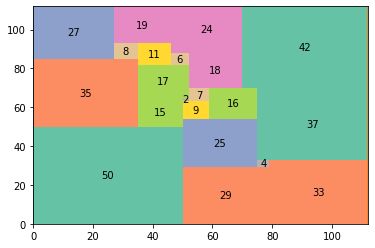

In [14]:
if msol and visu.is_visu_enabled():
    import matplotlib.cm as cm
    from matplotlib.patches import Polygon
    
    if not POP_UP_GRAPHIC:
        %matplotlib inline
    
    # Plot external square
    print("Plotting squares....")
    fig, ax = plt.subplots()
    plt.plot((0, 0), (0, SIZE_SQUARE), (SIZE_SQUARE, SIZE_SQUARE), (SIZE_SQUARE, 0))
    for i in range(len(SIZE_SUBSQUARE)):
        # Display square i
        (sx, sy) = (msol.get_var_solution(x[i]), msol.get_var_solution(y[i]))
        (sx1, sx2, sy1, sy2) = (sx.get_start(), sx.get_end(), sy.get_start(), sy.get_end())
        poly = Polygon([(sx1, sy1), (sx1, sy2), (sx2, sy2), (sx2, sy1)], fc=cm.Set2(float(i) / len(SIZE_SUBSQUARE)))
        ax.add_patch(poly)
        # Display identifier of square i at its center
        ax.text(float(sx1 + sx2) / 2, float(sy1 + sy2) / 2, str(SIZE_SUBSQUARE[i]), ha='center', va='center')
    plt.margins(0)
    plt.show()

## Summary

You learned how to set up and use the IBM Decision Optimization CPLEX Modeling for Python to formulate and solve a Constraint Programming model.

#### References
* [CPLEX Modeling for Python documentation](https://rawgit.com/IBMDecisionOptimization/docplex-doc/master/docs/index.html)
* [IBM Decision Optimization](https://www.ibm.com/analytics/decision-optimization)
* Need help with DOcplex or to report a bug? Please go [here](https://stackoverflow.com/questions/tagged/docplex)
* Contact us at dofeedback@wwpdl.vnet.ibm.com

Copyright © 2017, 2021 IBM. IPLA licensed Sample Materials.